In [10]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_stata( r"C:\Users\Anzony\Documents\GitHub\Diplomado_PUCP\_data/dime.dta")

In [3]:
# We know that our ID is not unique
df.ID_05.is_unique

False

In [4]:
# Drop all duplicates
df2 = df.drop_duplicates().copy()

In [5]:
# We see these duplicates are different in a lot of variables
print(df2[df2.ID_05.duplicated( keep = False )])

     ID_05      ID_06         ID_10 ID_10_CONFIRM ID_10_CORRECTED  INC_01  \
314   3730    Mubumwe  Rwamagana-35           Yes             NaN       0   
829   3730  Nyakabuye  Rwamagana-35           Yes             NaN   80000   

     INC_02  INC_03  INC_04  INC_06  ...  CRP08QA_C1_P1  CRP08QA_C1_P2  \
314       0       0       0       0  ...           80.0            NaN   
829       0       0       0   50000  ...           50.0           80.0   

     CRP08UA_C1_P1 CRP08UA_C1_P2 CRP09QA_C1_P1  CRP09QA_C1_P2  CRP09UA_C1_P1  \
314             kg           NaN           0.0            NaN            NaN   
829             kg            kg           0.0           50.0            NaN   

     CRP09UA_C1_P2  CRP10A_C1_P1 CRP10A_C1_P2  
314            NaN           NaN          NaN  
829             kg           NaN      10000.0  

[2 rows x 35 columns]


In [32]:
# Change ID for some rows
df2.loc[314, 'ID_05'] = 3730 * 2

In [33]:
# Now we do not have problems
df2[df2.ID_05.duplicated( keep = False )]


Empty DataFrame
Columns: [ID_05, ID_06, ID_10, ID_10_CONFIRM, ID_10_CORRECTED, INC_01, INC_02, INC_03, INC_04, INC_06, INC_10, INC_11, INC_12, AA_01_1, AA_01_2, AA_02_1, AA_02_2, EXP_25_1, EXP_25_2, EXP_26_1, EXP_26_2, plant_crop_plot1, plant_crop_plot2, A_CROP_C1_P1, A_CROP_C1_P2, CRP08QA_C1_P1, CRP08QA_C1_P2, CRP08UA_C1_P1, CRP08UA_C1_P2, CRP09QA_C1_P1, CRP09QA_C1_P2, CRP09UA_C1_P1, CRP09UA_C1_P2, CRP10A_C1_P1, CRP10A_C1_P2, INC_total, cultivated_unit_P1, cultivated_unit_P2, sold_unit_P1, sold_unit_P2, cultivated_kg_P1, cultivated_kg_P2, total_cultivated_kg, sold_kg_P1, sold_kg_P2, total_sold_kg, total_earnings_sell]
Index: []

[0 rows x 47 columns]

In [34]:
df2.ID_05.is_unique

True

Table 1 - Income: descriptive statistics (DS) table showing each income source and total income.

In [35]:
inc_cols = df2.filter(regex=("INC_*")).columns

for col in inc_cols:
    df2[f'{col}'] = df2[f'{col}'].replace( -88, np.nan )
    df2[f'{col}'] = df2[f'{col}'].replace( -66, np.nan )

In [36]:
# Sum all income sources
df2['INC_total'] = df2.filter(regex=("INC_*")).sum(axis = 1, skipna = False )

In [37]:
table1 = df2.filter(regex=("INC_*")).describe().transpose().round(2)
table1

count       mean         std  min      25%       50%       75%  \
INC_01     994.0   50415.91   161461.57  0.0      0.0       0.0   41500.0   
INC_02     995.0   57065.29   395754.68  0.0      0.0       0.0   25000.0   
INC_03     996.0    2277.27    20367.26  0.0      0.0       0.0       0.0   
INC_04     996.0   26644.59   250147.73  0.0      0.0       0.0       0.0   
INC_06     996.0    4777.01    30940.29  0.0      0.0       0.0       0.0   
INC_10     997.0     389.17     9832.38  0.0      0.0       0.0       0.0   
INC_11     992.0   65858.86   398896.39  0.0      0.0    5000.0   50000.0   
INC_12     995.0   47717.10    90796.39  0.0      0.0       0.0   60000.0   
INC_total  988.0  510416.90  1353091.22  0.0  80000.0  240000.0  506300.0   

                  max  
INC_01      3080000.0  
INC_02     11200000.0  
INC_03       500000.0  
INC_04      6000000.0  
INC_06       600000.0  
INC_10       300000.0  
INC_11     11200000.0  
INC_12      1053000.0  
INC_total  22568000.0

Table 2 - Agricultural production: For the three most commonly cultivated crops, display descriptive statistics for total quantity harvested, total quantity sold, and sales value

In [15]:
# from categorical to string
df2['CRP08UA_C1_P1'] = df2['CRP08UA_C1_P1'].astype( str )
df2['CRP08UA_C1_P2'] = df2['CRP08UA_C1_P2'].astype( str )
df2['CRP09UA_C1_P1'] = df2['CRP09UA_C1_P1'].astype( str )
df2['CRP09UA_C1_P2'] = df2['CRP09UA_C1_P2'].astype( str )

# replace nana string
df2['CRP08UA_C1_P1'] = df2.CRP08UA_C1_P1.replace( "nan", "no info").copy()
df2['CRP08UA_C1_P2'] = df2.CRP08UA_C1_P2.replace( "nan", "no info").copy()
df2['CRP09UA_C1_P1'] = df2['CRP09UA_C1_P1'].replace( "nan", "no info").copy()
df2['CRP09UA_C1_P2'] = df2['CRP09UA_C1_P2'].replace( "nan", "no info").copy()

# get unique values
units_P1 = df2.CRP08UA_C1_P1.unique().tolist()
units_P2 = df2.CRP08UA_C1_P2.unique().tolist()
units_P3 = df2.CRP09UA_C1_P1.unique().tolist()
units_P4 = df2.CRP09UA_C1_P2.unique().tolist()

# Get unique units of measure
unique_unit = list(set(units_P1).union(set(units_P2)).union( set(units_P3) ).union(  set(units_P4) )  )
print(unique_unit)

# Generate unique metrics Kg
replace_vals = [1.5,  1000, 10, 25, 100, np.nan,  5, 1, 50, 2.5, 2.5, 15]

# replace string with values
df2['cultivated_unit_P1'] = df2['CRP08UA_C1_P1'].copy()
df2['cultivated_unit_P2'] = df2['CRP08UA_C1_P2'].copy()
df2['sold_unit_P1'] = df2['CRP09UA_C1_P1'].copy()
df2['sold_unit_P2'] = df2['CRP09UA_C1_P2'].copy()
for str_unit, val_unit in zip( unique_unit, replace_vals ):
    df2['cultivated_unit_P1'] = df2['cultivated_unit_P1'].replace(str_unit, val_unit )
    df2['cultivated_unit_P2'] = df2['cultivated_unit_P2'].replace(str_unit, val_unit )
    df2['sold_unit_P1'] = df2['sold_unit_P1'].replace(str_unit, val_unit )
    df2['sold_unit_P2'] = df2['sold_unit_P2'].replace(str_unit, val_unit )

['50 Kg sack', '25 Kg sack', 'tons', '100 Kg sack', 'Bucket (5 kg): Imbegeti (5kg)', '10 kg basket: 10 kg Agatebo', 'Mironko (1.5 kg)', 'kg', '15 kg basket: 15 kg Agatebo', 'no info', 'Bucket (2.5kg): Imbegeti (2.5kg)']


In [16]:
# Change Nulls with zeros when hh do not cultivate
for val in range(1,3):
    filter1 = df2[f'plant_crop_plot{val}'] == 0
    df2.loc[ filter1 , f'CRP10A_C1_P{val}'] = 0
    df2.loc[ filter1 , f'CRP08QA_C1_P{val}'] = 0
    df2.loc[ filter1 , f'CRP09QA_C1_P{val}'] = 0
    df2.loc[ filter1 , f'cultivated_unit_P{val}'] = 0
    df2.loc[ filter1 , f'sold_unit_P{val}'] = 0

In [17]:
# Cultivated Kg
df2['cultivated_kg_P1'] = df2['CRP08QA_C1_P1'] * df2['cultivated_unit_P1']
df2['cultivated_kg_P2'] = df2['CRP08QA_C1_P2'] * df2['cultivated_unit_P2']
df2['total_cultivated_kg'] = df2['cultivated_kg_P1']  + df2['cultivated_kg_P2']

# No sales, no money
filter1 = df2.CRP09QA_C1_P1 ==0
df2.loc[filter1 , 'CRP10A_C1_P1'] = 0
df2.loc[filter1 , 'sold_unit_P1'] = 0

# No sales, no money
filter1 = df2.CRP09QA_C1_P2 ==0
df2.loc[filter1 , 'CRP10A_C1_P2'] = 0
df2.loc[filter1 , 'sold_unit_P2'] = 0

# Sold Kg
df2['sold_kg_P1'] = df2['CRP09QA_C1_P1'] * df2['sold_unit_P1']
df2['sold_kg_P2'] = df2['CRP09QA_C1_P2'] * df2['sold_unit_P2']
df2['total_sold_kg'] = df2['sold_kg_P1']  + df2['sold_kg_P2']



# Sales
df2['total_earnings_sell'] = df2.filter(regex=("CRP10A*")).sum(axis = 1,  skipna = False )

Most Commonly cultivated crops: We define this metrics as the number of households that cultivate this crop.

We want to count how many houswholds cultivate an specific crop

In [18]:
# N Households cultivate idcrop in Plot 1
df_aux_p1 = df2.groupby('A_CROP_C1_P1' , as_index = False).ID_05.count() \
                .rename(columns = {'A_CROP_C1_P1' : 'crop', 'ID_05' : 'N_Households_1'} )
# N Households cultivate idcrop in Plot 2
df_aux_p2 = df2.groupby('A_CROP_C1_P2' , as_index = False).ID_05.count() \
                .rename(columns = {'A_CROP_C1_P2' : 'crop', 'ID_05' : 'N_Households_2'} )

# Total households taking into account all crops
dft = df_aux_p1.merge(df_aux_p2, on = 'crop', how = 'outer')

# Get total
dft['Total_Households'] = dft.filter(regex=("N_*")).sum( axis = 1 )

# Drop values
df_crop_hh = dft.drop(['N_Households_2', 'N_Households_1'], axis = 1).copy()

# Get the three most cultivated crops
print(df_crop_hh.sort_values('Total_Households', ascending=False).head(3))

crop_top3 = df_crop_hh.sort_values('Total_Households', ascending=False).head(3).crop.tolist()

         crop  Total_Households
5   Dry Beans             895.0
1     Sorghum             195.0
14      Maize              80.0


In [19]:
df2_P1 = df2[['ID_05', 'A_CROP_C1_P1','cultivated_kg_P1', 'sold_kg_P1', 'CRP10A_C1_P1']].copy()
df2_P1.columns = ['id', 'crop', 'cultivated_kg', 'sold_kg', 'sold_value' ]
df2_P1['p'] = 1

In [20]:
df2_P2 = df2[['ID_05', 'A_CROP_C1_P2','cultivated_kg_P2', 'sold_kg_P2', 'CRP10A_C1_P2']].copy()
df2_P2.columns = ['id', 'crop', 'cultivated_kg', 'sold_kg', 'sold_value' ]
df2_P2['p'] = 2

In [26]:
df_tb2 = pd.concat([df2_P1, df2_P2], axis = 0 )

In [27]:
filter_crop = df_tb2.crop.isin( crop_top3 )

In [28]:
df_tb2[filter_crop].drop(['p', 'id'], axis =1 ) \
        .groupby(['crop']).describe().stack().round(2)
    

cultivated_kg  sold_kg  sold_value
crop                                               
Dry Beans count         890.00   851.00      851.00
          mean         1357.18    15.76     5330.69
          std         30197.30    48.05    16707.13
          min          -888.00     0.00        0.00
          25%            18.00     0.00        0.00
          50%            40.00     0.00        0.00
          75%            80.00     0.00        0.00
          max        855000.00   600.00   185000.00
Maize     count          80.00    72.00       72.00
          mean          119.34    67.13    19092.36
          std           230.08   110.33    38103.11
          min          -888.00     0.00        0.00
          25%            22.50     0.00        0.00
          50%            75.00    25.00     6750.00
          75%           150.00   100.00    20000.00
          max          1100.00   600.00   200000.00
Sorghum   count         195.00   179.00      179.00
          mean        14816.01   162.39    31498.27
          std        155123.44   439.78    62967.23
          min          -888.00     0.00        0.00
          25%            50.00     0.75       25.50
          50%           120.00    70.00    15000.00
          75%           275.00   200.00    40000.00
          max       1995000.00  5540.00   700000.00

A graph representing the data on flour consumption (the exact nature of the graph is at your discretion).

In [29]:
import seaborn as sns

In [30]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Consumption of floor in Households')

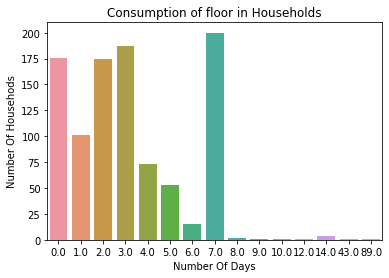

In [31]:
sns.countplot(x=df["EXP_25_1"])
plt.xlabel( 'Number Of Days')
plt.ylabel( 'Number Of Househods')
plt.title( 'Consumption of floor in Households')